In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import math

In [2]:
voyages_df = pd.read_csv("../output/voyages.csv", sep = ";", encoding = "utf8")
ships_df = pd.read_csv("../output/ships.csv", sep = ";", encoding = "utf8")

## Active voyages per year

Calculate the number of voyages active per year

In [3]:
def active_voyage_creator(voyages_df):
    active_voyages_dict = {}
    for year in range(1600, 1850):
        active_voyages_dict[year] = 0
    start_years = voyages_df["start"].tolist()
    end_years = voyages_df["end"].tolist()
    for start, end in zip(start_years, end_years):
        if str(start).isdigit() and str(end).isdigit():
            start = int(start)
            end = int(end)
            if start in range(1600, 1850) and end in range(1600, 1850):
                for year in range(start, end + 1):
                    active_voyages_dict[year] += 1  
    active_voyages_df = pd.DataFrame.from_dict(active_voyages_dict, orient = "index")
    active_voyages_df.rename(columns = {0: "count"}, inplace = True)
    active_voyages_df = active_voyages_df.reset_index().rename(columns = {"index": "year"})
    return active_voyages_df
active_voyages_df = active_voyage_creator(voyages_df)
active_voyages_df.head()

,year,count
0,1600,4
1,1601,6
2,1602,2
3,1603,4
4,1604,5


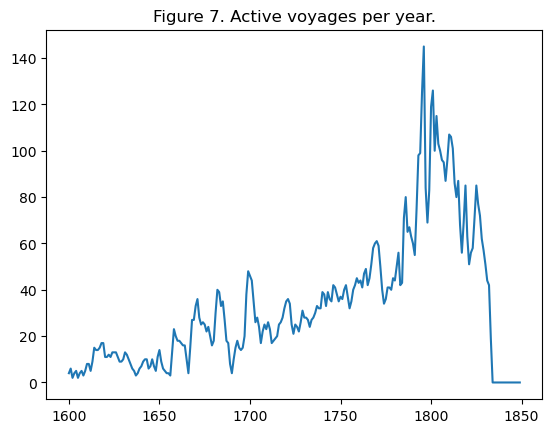

In [4]:
fig, ax = plt.subplots()
ax.plot(active_voyages_df["year"], active_voyages_df["count"])
plt.title("Figure 7. Active voyages per year.")
plt.savefig("voyages/voyages_per_year.png",
            dpi = 300,
            facecolor = "white",
            bbox_inches = "tight")
plt.show()

How many voyages were active in 1600?

In [5]:
active_voyages_df.loc[active_voyages_df["year"] == 1600]

,year,count
0,1600,4


What were the years with the most activity?

In [6]:
active_voyages_df.sort_values(by = ["count"], ascending = False)[:10]

,year,count
196,1796,145
201,1801,126
195,1795,125
200,1800,119
203,1803,115
210,1810,107
211,1811,106
204,1804,103
212,1812,101
202,1802,100


Look at the 1800 spike in more detail

In [7]:
active_voyages_df.loc[(active_voyages_df["year"] > 1790) & (active_voyages_df["year"] < 1810)]

,year,count
191,1791,55
192,1792,75
193,1793,98
194,1794,99
195,1795,125
196,1796,145
197,1797,84
198,1798,69
199,1799,83
200,1800,119


Plot relative changes in active voyages per year

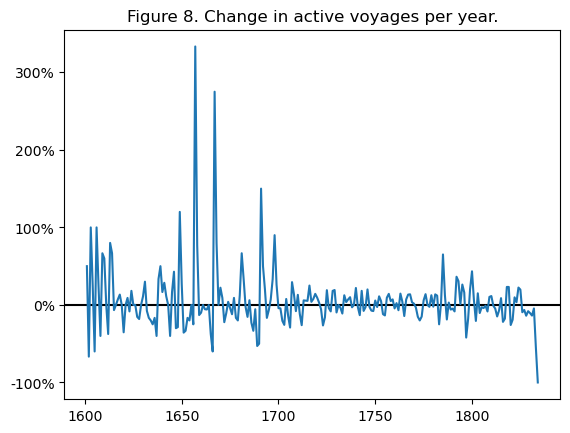

In [29]:
active_voyages_df["change"] = active_voyages_df["count"] / active_voyages_df["count"].shift(1)
fig, ax = plt.subplots()
plt.axhline(y = 1, color = "black", linestyle = "-")
ax.plot(active_voyages_df["year"], active_voyages_df["change"])
# Convert absolute numbers to percentages
def get_percentage(y):
    return (y - 1)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f"{get_percentage(y)*100:.0f}%"))
plt.title("Figure 8. Change in active voyages per year.")
plt.savefig("voyages/change.png",
            dpi = 300,
            facecolor = "white",
            bbox_inches = "tight")
plt.show()

What were the years with the largest relative increases?

In [9]:
active_voyages_df.sort_values(by = ["change"], ascending = False)[:10]

,year,count,change
57,1657,13,4.333333
67,1667,15,3.750000
91,1691,10,2.500000
49,1649,11,2.200000
3,1603,4,2.000000
6,1606,4,2.000000
98,1698,38,1.900000
13,1613,9,1.800000
68,1668,27,1.800000
58,1658,23,1.769231


What were the years with the largest relative decreases?

In [10]:
active_voyages_df.sort_values(by = ["change"])[:10]

,year,count,change
234,1834,0,0.000000
2,1602,2,0.333333
66,1666,4,0.400000
5,1605,2,0.400000
233,1833,19,0.452381
89,1689,8,0.470588
90,1690,4,0.500000
197,1797,84,0.579310
8,1608,3,0.600000
37,1637,3,0.600000


Look at the years following 1770 in more detail

In [11]:
active_voyages_df.loc[active_voyages_df["year"] > 1770]

,year,count,change
171,1771,59,0.967213
172,1772,50,0.847458
173,1773,40,0.800000
174,1774,34,0.850000
175,1775,36,1.058824
...,...,...,...
245,1845,0,NaN
246,1846,0,NaN
247,1847,0,NaN
248,1848,0,NaN


## New Company

In [13]:
new_company_ships = ships_df.loc[ships_df["raw"].str.contains("New Company")]["ship_id"].tolist()
old_company_voyages_df = voyages_df.loc[~voyages_df["ship_id"].isin(new_company_ships)]
old_active_voyages_df = active_voyage_creator(old_company_voyages_df)
new_company_voyages_df = voyages_df.loc[voyages_df["ship_id"].isin(new_company_ships)]
new_active_voyages_df = active_voyage_creator(new_company_voyages_df)

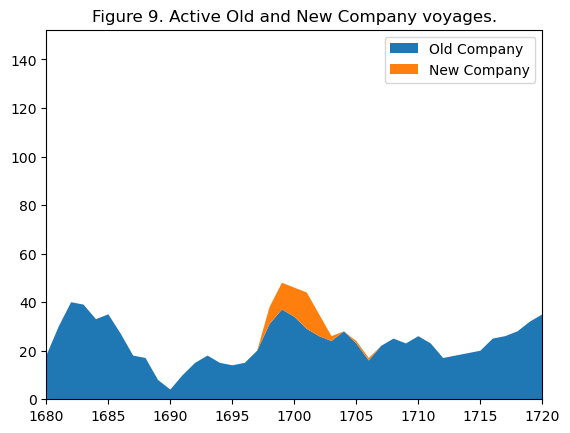

In [14]:
x = old_active_voyages_df["year"]
y = [old_active_voyages_df["count"], new_active_voyages_df["count"]]
labels = ["Old Company", "New Company"]
plt.stackplot(x, y, labels=labels)
plt.xlim(1680, 1720)
plt.title("Figure 9. Active Old and New Company voyages.")
plt.legend()
plt.savefig("voyages/old_vs_new.png",
            dpi = 300,
            facecolor = "white",
            bbox_inches = "tight")
plt.show()

## Active tonnage per year

How many voyages do we have in the data? For how many do we have data on ship tonnage?

In [15]:
voyage_ships_df = pd.merge(voyages_df, ships_df,
                            how = "left",
                            on = "ship_id")
len(voyage_ships_df.index), len(voyage_ships_df.loc[voyage_ships_df["tons"].notna()])

(4455, 4134)

Plot active tonnage per year

In [16]:
active_tonnage_dict = {}
for year in range(1600, 1850):
    active_tonnage_dict[year] = 0
start_years = voyage_ships_df["start"].tolist()
end_years = voyage_ships_df["end"].tolist()
tons = voyage_ships_df["tons"].tolist()
voyage_counter = 0
while voyage_counter < len(start_years):
    if str(start_years[voyage_counter]).isdigit() and str(end_years[voyage_counter]).isdigit():
        start = int(start_years[voyage_counter])
        end = int(end_years[voyage_counter])
        #tonnage = int(tons[voyage_counter])
        if not np.isnan(tons[voyage_counter]): 
            tonnage = tons[voyage_counter]
            if start in range(1600, 1850) and end in range(1600, 1850):
                    for year in range(start, end + 1):
                        active_tonnage_dict[year] += tonnage
    voyage_counter += 1
active_tonnage_df = pd.DataFrame.from_dict(active_tonnage_dict, orient = "index")
active_tonnage_df.rename(columns = {0: "count"}, inplace = True)
active_tonnage_df = active_tonnage_df.reset_index().rename(columns = {"index": "year"})
active_tonnage_df.head()

,year,count
0,1600,1430.0
1,1601,1560.0
2,1602,130.0
3,1603,2050.0
4,1604,2250.0


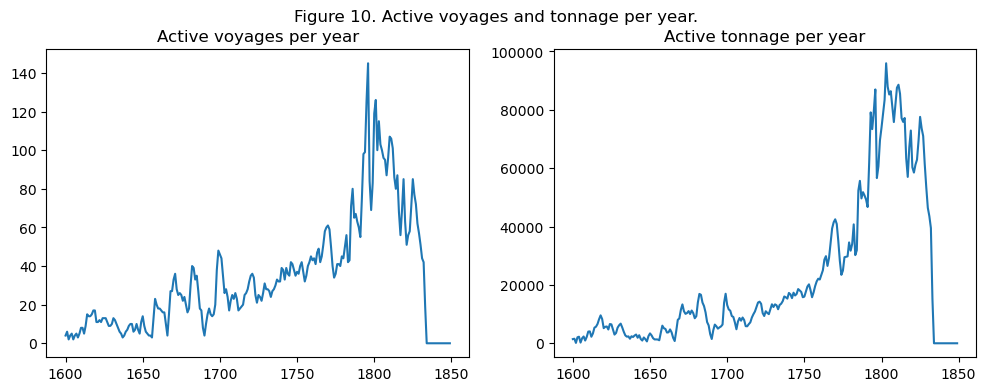

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(active_voyages_df["year"], active_voyages_df["count"])
axs[0].set_title("Active voyages per year")
axs[1].plot(active_tonnage_df["year"], active_tonnage_df["count"])
axs[1].set_title("Active tonnage per year")
plt.suptitle("Figure 10. Active voyages and tonnage per year.")
plt.subplots_adjust(wspace=0.2)
plt.savefig("voyages/tonnage_per_year.png", dpi=300, facecolor="white", bbox_inches="tight")
plt.show()

What years had the most active tonnage?

In [18]:
active_tonnage_df.sort_values(by = "count", ascending = False)

,year,count
203,1803,95959.0
211,1811,88604.0
204,1804,87938.0
210,1810,87590.0
196,1796,86991.0
...,...,...
238,1838,0.0
237,1837,0.0
235,1835,0.0
234,1834,0.0
